In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import Adam
import os
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np

In [11]:
IMG_HEIGHT=48 
IMG_WIDTH = 48
batch_size=32

In [16]:
train_data_dir = "archive (2)/train"
validation_data_dir = "archive (2)/test"
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


In [49]:
train_generator = train_datagen.flow_from_directory(train_data_dir,color_mode='grayscale',target_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=batch_size,class_mode='categorical',shuffle=True)

Found 28709 images belonging to 7 classes.


In [18]:
validation_generator = validation_datagen.flow_from_directory(validation_data_dir,color_mode='grayscale',
target_size=(IMG_HEIGHT, IMG_WIDTH),batch_size=batch_size,class_mode='categorical',shuffle=True)

Found 7178 images belonging to 7 classes.


In [19]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

In [20]:
img, label = train_generator.__next__()

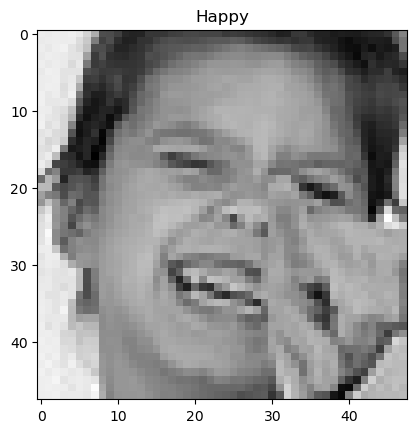

In [28]:
import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [25]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

In [26]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [29]:
train_path = "archive (2)/train"
test_path = "archive (2)/test"

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)


In [30]:
epochs=50


In [31]:
history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//batch_size)

model.save('emotion_detection_model_100epochs.h5')

Epoch 1/50
897/897 [==============================] - 399s 442ms/step - loss: 1.6483 - accuracy: 0.3421 - val_loss: 1.4111 - val_accuracy: 0.4545
Epoch 2/50
897/897 [==============================] - 249s 277ms/step - loss: 1.3370 - accuracy: 0.4843 - val_loss: 1.2386 - val_accuracy: 0.5198
Epoch 3/50
897/897 [==============================] - 193s 215ms/step - loss: 1.1973 - accuracy: 0.5424 - val_loss: 1.1549 - val_accuracy: 0.5571
Epoch 4/50
897/897 [==============================] - 179s 200ms/step - loss: 1.0989 - accuracy: 0.5846 - val_loss: 1.1291 - val_accuracy: 0.5663
Epoch 5/50
897/897 [==============================] - 180s 200ms/step - loss: 1.0194 - accuracy: 0.6178 - val_loss: 1.1087 - val_accuracy: 0.5837
Epoch 6/50
897/897 [==============================] - 238s 265ms/step - loss: 0.9393 - accuracy: 0.6492 - val_loss: 1.1055 - val_accuracy: 0.5838
Epoch 7/50
897/897 [==============================] - 179s 200ms/step - loss: 0.8594 - accuracy: 0.6795 - val_loss: 1.1076 -

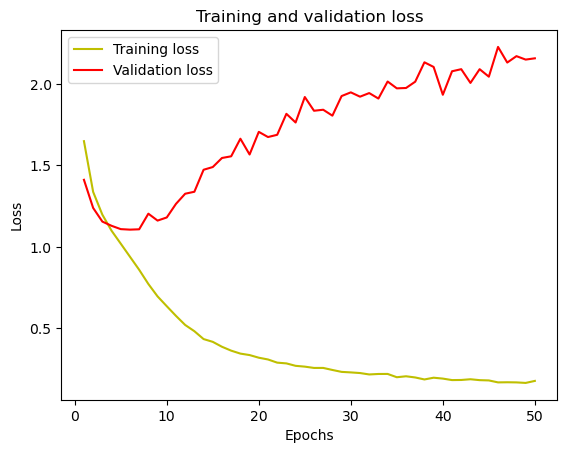

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

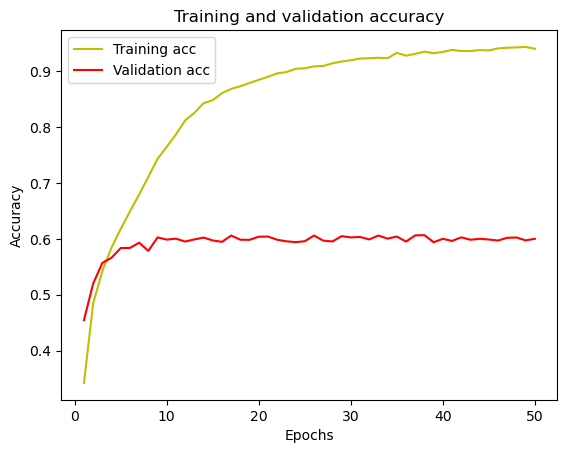

In [34]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [35]:
from keras.models import load_model


In [36]:
my_model = load_model('emotion_detection_model_100epochs.h5', compile=False)

In [38]:
test_img, test_lbl = validation_generator.__next__()
predictions=my_model.predict(test_img)


1/1 [==============================] - 0s 211ms/step


In [39]:
predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

In [40]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))


Accuracy =  0.6875


<AxesSubplot:>

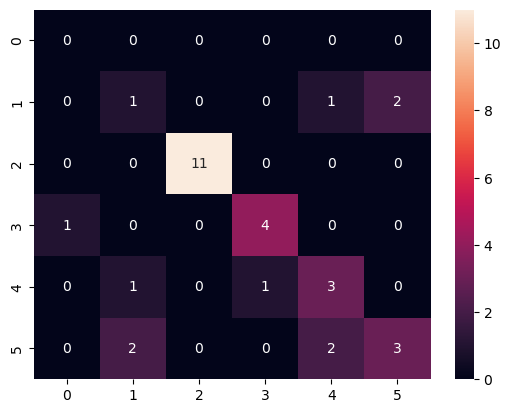

In [43]:
from sklearn.metrics import confusion_matrix
con = confusion_matrix(test_labels, predictions)
#print(con)
import seaborn as sns
sns.heatmap(con, annot=True)

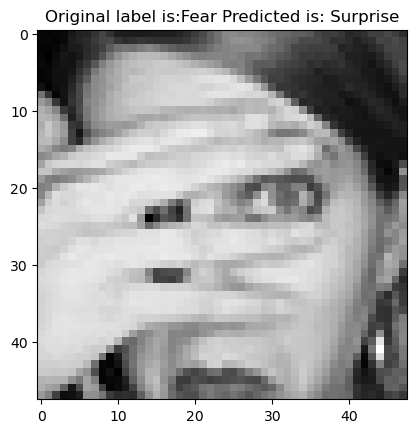

In [48]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_label = class_labels[test_labels[n]]
pred_label = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_label+" Predicted is: "+ pred_label)
plt.show()
